In [32]:
!pip install shap


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import shap


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import shap


In [35]:
df = pd.read_csv("data/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [37]:
df.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)


In [38]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [39]:
df['Title'].value_counts()


Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [40]:
df['Title'] = df['Title'].replace(
    ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
    'Rare'
)


In [41]:
df.drop('Name', axis=1, inplace=True)


In [42]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [43]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)


In [44]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)
df.drop('Cabin', axis=1, inplace=True)


In [45]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [46]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [47]:
le = LabelEncoder()

for col in ['Sex', 'Embarked', 'Title']:
    df[col] = le.fit_transform(df[col])


In [48]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [50]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



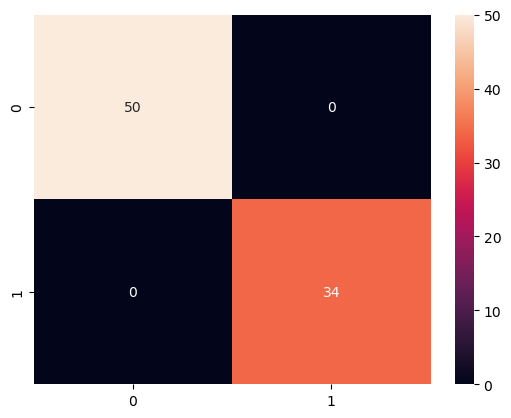

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [53]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


In [54]:
shap.summary_plot(shap_values[1], X_test)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [55]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


In [56]:
type(shap_values), len(shap_values)


(numpy.ndarray, 84)

In [57]:
shap.summary_plot(shap_values[1], X_test)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [58]:
shap_values[1].shape, X_test.shape


((8, 2), (84, 8))

In [59]:
explainer = shap.Explainer(model, X_train)


In [60]:
shap_values = explainer(X_test)


In [61]:
shap_values.values.shape, X_test.shape


((84, 8, 2), (84, 8))

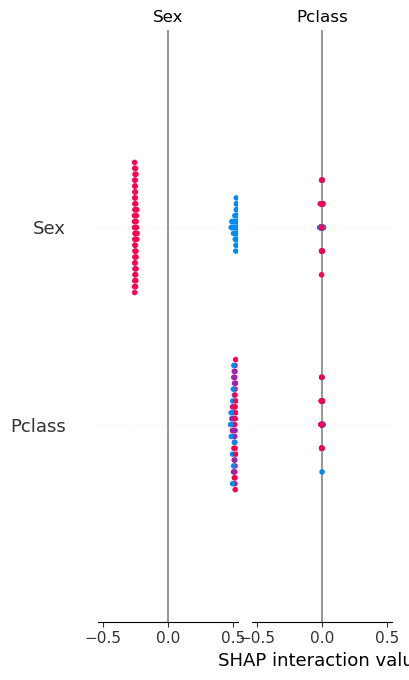

In [62]:
shap.summary_plot(shap_values.values, X_test)


In [63]:
sample = X_test.iloc[0:1]
prediction = model.predict(sample)
probability = model.predict_proba(sample)

prediction, probability


(array([0]), array([[1., 0.]]))

In [64]:
import joblib
joblib.dump(model, "titanic_survival_model.pkl")


['titanic_survival_model.pkl']